## Step 1 : Package import
lets import all the necessary python packages

In [1]:
# basic python liabraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\suraj.lahase\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\suraj.lahase\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\suraj.lahase\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# Taxtblob is NLP library built on top of NLTK used for sentiment analysis
from textblob import TextBlob

In [5]:
# wordclod is another python liabrary used for text analysis
# Wordcloud is basically a visualization technique to represent the frequency of words in a text where the size of the word represents its frequency
from wordcloud import WordCloud , STOPWORDS

In [6]:
# The main purpose of this package is converting Unicode emoji to emoji names and vice versa with emojize() and demojize()
# Read the documentation here https://carpedm20.github.io/emoji/docs/
import emoji

In [7]:
# Counter is a subclass of dict that's specially designed for counting hashable objects in Python. 
# It's a dictionary that stores objects as keys and counts as values. 
from collections import Counter

In [8]:
# Plotly is an interactive, open-source pythons' plotting library that supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases.
import plotly.graph_objs as go
from plotly.offline import iplot

In [9]:
comments=pd.read_csv(r'data\UScomments.csv', error_bad_lines = False)

C:\Users\suraj.lahase\AppData\Local\Temp\ipykernel_5468\3953789216.py:1: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



Skipping line 41589: expected 4 fields, saw 11
Skipping line 51628: expected 4 fields, saw 7
Skipping line 114465: expected 4 fields, saw 5

Skipping line 142496: expected 4 fields, saw 8
Skipping line 189732: expected 4 fields, saw 6
Skipping line 245218: expected 4 fields, saw 7

Skipping line 388430: expected 4 fields, saw 5

C:\Users\suraj.lahase\AppData\Local\Temp\ipykernel_5468\3953789216.py:1: DtypeWarning:

Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.



In [10]:
comments.head()

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0

In [11]:
comments.shape

(691400, 4)

In [12]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691400 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691400 non-null  object
 1   comment_text  691375 non-null  object
 2   likes         691400 non-null  object
 3   replies       691400 non-null  object
dtypes: object(4)
memory usage: 21.1+ MB


In [13]:
## find out missing values in our data
comments.isna().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [14]:
## drop missing values as we have very few & update dataframe as well..
comments.dropna(inplace=True)

In [15]:
comments.isna().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [16]:
# Since the data is quite large we will only consider a sample of the data for current notebook 
comments = comments.sample(n = 10000)
comments.head()

video_id                                       comment_text likes  \
367112  ml8Dj5OSR-M  the most northernmost town is actually Alert,C...     0   
272518  kFx0h3YDXz0                                CANADA TORONTO!!!!!     1   
157835  yIq-N7m0upU                                                Wow     0   
399699  2UMfEfUR7wM  Not a bad tune, but holy cow that many placeme...     0   
131024  sD6RIeNP41I  You guys dont seem to understand the game. You...     0   

       replies  
367112       2  
272518       0  
157835       0  
399699       0  
131024       0

## Step 1 : Sentiment Analysis

### lets perform sentiment analysis using TextBlob which is a NLP library built on top of NLTK (Natural Language ToolKit )

- TextBlob returns a sentence's polarity and subjectivity. 
- Polarity is defined as [-1,1], where -1 represents a negative sentiment and 1 represents a positive sentiment. 
- Semantic labels in TextBlob aid in fine-grained analysis. For example, emoticons, exclamation points, emojis, and so on.
- Subjectivity is located between [0,1]. 
- Subjectivity is a measure of the amount of personal opinion and factual information in a text. 
- Because the text is more subjective, it contains personal opinion rather than factual information. 
- TextBlob has one more setting — intensity. TextBlob computes subjectivity by examining the 'intensity'. 
- The intensity of a word determines whether it modifies the next word. Adverbs are used as modifiers in English ('very good').

In [17]:
polarity=[]
subjectivity = []
for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
        subjectivity.append(TextBlob(comment).sentiment.subjectivity)
    except:
        polarity.append(0)
        subjectivity.append(-1)

In [18]:
polarity[:10]

[0.25,
 0.0,
 0.1,
 0.30416666666666664,
 0.07333333333333332,
 0.0,
 0.55,
 0.0,
 -0.08333333333333333,
 0.0]

In [19]:
subjectivity[:10]

[0.3,
 0.0,
 1.0,
 0.4583333333333333,
 0.3533333333333334,
 0.0,
 0.9444444444444444,
 0.0,
 0.08333333333333333,
 0.0]

In [20]:
comments['polarity']=polarity
comments['subjectivity']=subjectivity

In [21]:
comments.head()

video_id                                       comment_text likes  \
367112  ml8Dj5OSR-M  the most northernmost town is actually Alert,C...     0   
272518  kFx0h3YDXz0                                CANADA TORONTO!!!!!     1   
157835  yIq-N7m0upU                                                Wow     0   
399699  2UMfEfUR7wM  Not a bad tune, but holy cow that many placeme...     0   
131024  sD6RIeNP41I  You guys dont seem to understand the game. You...     0   

       replies  polarity  subjectivity  
367112       2  0.250000      0.300000  
272518       0  0.000000      0.000000  
157835       0  0.100000      1.000000  
399699       0  0.304167      0.458333  
131024       0  0.073333      0.353333

### b) Sentiment analysis using NLTK Vader SentimentAnalyzer..


In [22]:
from nltk.sentiment import SentimentIntensityAnalyzer

# SentimentIntensityAnalyzer() Give a sentiment intensity scores for sentences

sia = SentimentIntensityAnalyzer()

polarity_b = []
for comment in comments["comment_text"]:
    polarity_b.append(sia.polarity_scores(comment)) # returns list of dictionary

In [23]:
polarity_b[:10]

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5859},
 {'neg': 0.176, 'neu': 0.735, 'pos': 0.088, 'compound': -0.4431},
 {'neg': 0.085, 'neu': 0.823, 'pos': 0.092, 'compound': 0.0772},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.068, 'neu': 0.603, 'pos': 0.329, 'compound': 0.8591},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}]

In [24]:
category_data = pd.read_csv(r'data\category_file.csv')
category_data.head()

category_id   category_columns
0            1   Film & Animation
1            2   Autos & Vehicles
2           10              Music
3           15     Pets & Animals
4           17             Sports

In [25]:
video_data = pd.read_csv(r'data/additional_data/USvideos.csv')
video_data.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [26]:
df = video_data.merge(category_data, on = "category_id")
df.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  0mlNzVSJrT0      17.14.11   
2  STI2fI7sKMo      17.14.11   
3  KODzih-pYlU      17.14.11   
4  8mhTWqWlQzU      17.14.11   

                                               title       channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE        CaseyNeistat   
1                               Me-O Cats Commercial             Nobrand   
2  AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...  Shawn Johnson East   
3  BLIND(folded) CAKE DECORATING CONTEST (with Mo...        Grace Helbig   
4      Wearing Online Dollar Store Makeup For A Week      Safiya Nygaard   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           22  2017-04-21T06:47:32.000Z   
2           22  2017-11-11T15:00:03.000Z   
3           22  2017-11-11T18:08:04.000Z   
4           22  2017-11-11T01:19:33.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1                          cute|"cats"|"thai"|"eggs"    98966    2486   
2  shawn johnson|"andrew east"|"shawn east"|"shaw...   321053    4451   
3  itsgrace|"funny"|"comedy"|"vlog"|"grace"|"helb...   197062    7250   
4  wearing online dollar store makeup for a week|...  2744430  115426   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1       184            532  https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg   
2      1772            895  https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg   
3       217            456  https://i.ytimg.com/vi/KODzih-pYlU/default.jpg   
4      1110           6541  https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description category_columns  
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...   People & Blogs  
1  Kittens come out of the eggs in a Thai commerc...   People & Blogs  
2  Subscribe for weekly videos ▶ http://bit.ly/sj...   People & Blogs  
3  Molly is an god damn amazing human and she cha...   People & Blogs  
4  I found this online dollar store called ShopMi...   People & Blogs

#### The optimised code or an alternet approach to the above solution is defined below

In [27]:
### if we want more optimal results..
### first we have to pre-process all the data..

### performing Sentiment analysis on Video's tags..

from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re


def getting_polarity(category):
    tags=df[df['category_columns']==category]['tags']
    tags=tags.str.lower()
    tags_all=tags.str.cat()
    ### ^-except than A-Za-z  ,whatever we have just replace it with space
    tags_word = re.sub('[^A-Za-z]+', ' ', tags_all)
    ### lets create a list from tags_word so that we can remove stopwords from tags_word
    tokens_word = word_tokenize(tags_word)
    
    eng_stopwords = list(stopwords.words('english'))
    ge_stopwords = list(stopwords.words('german'))   
    fra_stopwords = list(stopwords.words('french'))   
    rus_stopwords= list(stopwords.words('russian')) 
    
    eng_stopwords.extend(ge_stopwords)
    eng_stopwords.extend(fra_stopwords)
    eng_stopwords.extend(rus_stopwords)
    filtered_words = [w for w in tokens_word if not w in eng_stopwords]
    ### lets consider those words who have atleast 3 chars or more..

    without_single_double_chr = [word for word in filtered_words if len(word) > 2]
    
    # Remove numbers
    cleaned_data_title = [word for word in without_single_double_chr if not word.isdigit()]

    ##Calculate frequency distribution
    word_dist = nltk.FreqDist(cleaned_data_title)
    
    dist = pd.DataFrame(word_dist.most_common(100),
                columns=['Word', 'Frequency'])
    polarities=[]
    compound = .0
    for word in dist['Word']:
        compound += SentimentIntensityAnalyzer().polarity_scores(word)['compound']
    return compound

In [28]:
# finding polarity for "Film & Animation" category
getting_polarity(' Film & Animation')

2.5681

In [29]:
final_pol=[]

for category in df['category_columns'].unique():
    final_pol.append(getting_polarity(category))

In [30]:
final_pol

[5.037300000000001,
 4.4041,
 5.5125,
 1.7858999999999998,
 2.5681,
 1.9204,
 4.186999999999999,
 4.3366999999999996,
 4.6972000000000005,
 2.2346,
 2.5827,
 0.42410000000000014,
 2.3931999999999998,
 3.9879000000000007,
 -0.032400000000000095,
 0.04880000000000001]

[Text(0.5, 1.0, 'Video Categories with their Polarity'),
 Text(0.5, 0, 'Polarity'),
 Text(0, 0.5, 'Video Categories')]

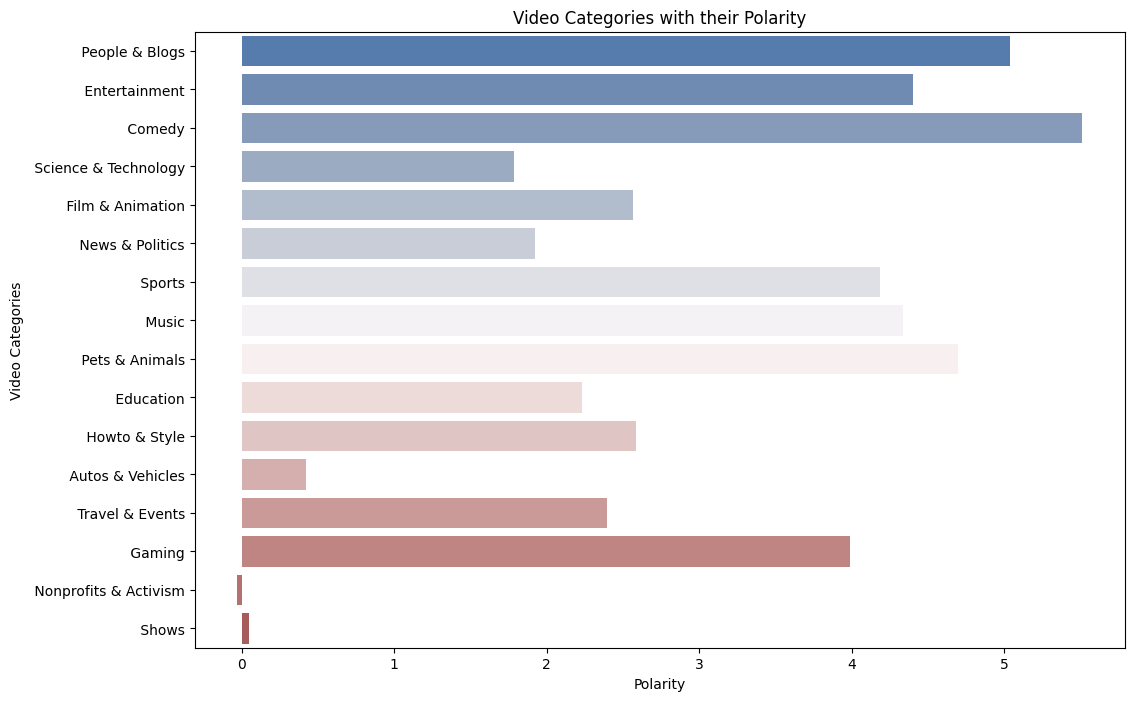

In [31]:
## palette-->> RdBu(Red-blue)
plt.figure(figsize=(12,8))
gf = sns.barplot(x=final_pol,y=df['category_columns'].unique() ,orient='h',palette= "vlag")
gf.set(title = "Video Categories with their Polarity", xlabel = "Polarity", ylabel = "Video Categories")

## Step 2 :  Wordcloud Analysis of your data

### Lets perform EDA for the Positve sentences

In [32]:
comments_positive=comments[comments['polarity']==1]

In [33]:
comments_negative=comments[comments['polarity']==-1]

In [34]:
comments_negative.head(2)

video_id                       comment_text likes replies  \
187619  X7WFMUq5ECE              This is so terrible 😂     0       0   
360840  _Pom2EYv3NM  The background singers are insane     4       0   

        polarity  subjectivity  
187619      -1.0           1.0  
360840      -1.0           1.0

In [35]:
comments_negative['comment_text']

187619                                This is so terrible 😂
360840                    The background singers are insane
641931    Well this will be an awful season. Who would w...
111735            Burning device mATE THAT'S A BLOODY BOMB!
629161    Allspark pictures sounds like a really terribl...
238289             That's a BAD photo !!! Yesss Tay Tay😍😍😍😍
451442    I thought that if they made a sequel that the ...
522207                                           Disgusting
444568                                             Pathetic
188913    2017 Emmys was The worst piece of trash on T.V...
620535    Watching these people one understands how come...
245925                         The media is our worst enemy
141678                      Devastating. Im sending prayers
627112                     Cause nobody cares when i boring
599729                                   Fucking badass!!!!
462926               As a vegan, this is my worst nightmare
292027    The way I hear it, if I get th

In [36]:
total_comments=' '.join(comments_negative['comment_text'])

In [37]:
total_comments[0:100]

'This is so terrible 😂 The background singers are insane Well this will be an awful season. Who would'

(-0.5, 399.5, 199.5, -0.5)

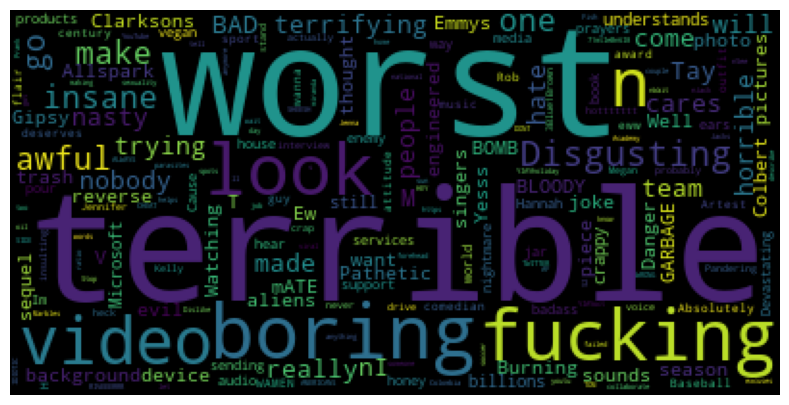

In [38]:
wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

#### Conclusion :  Users are emphasizing more on Terrible , worst ,horrible ,boring , disgusting etc..

### 2.1 Extract Negative comments using query() function of pandas..

In [39]:
comments.query('polarity==1')

video_id                                       comment_text likes  \
403184  xU5-_EGfcHw                        SNL is the best show ever!!     1   
161053  lse3oJfPPk4  Imagine once they roll out the Series 3 and th...     0   
674075  4z4xoO-NGUg                             NFL? Happy to dislike!     1   
224785  5DDB6YnVCoA                                              <3 <3     0   
533526  XCWmONajkOg                                       Great song!!     0   
...             ...                                                ...   ...   
25378   o0hMhEsMUs0                          This is BEAUTIFUL!!! 🔥🔥🔥🔥     6   
399889  xGuGjvIfof8                              The laptop is awesome     0   
590189  qRoVlH1OcI4                               The fucking best !!!     2   
544454  r_Vv6abqauM                   You deserve more subs !!!!!!!!!!     0   
246744  8ijNvyEbQ_g  Was the 9 premature? Probably. Do I care? Nope...    14   

       replies  polarity  subjectivity  
403184       0       1.0          0.30  
161053       0       1.0          0.70  
674075       1       1.0          1.00  
224785       0       1.0          1.00  
533526       0       1.0          0.75  
...        ...       ...           ...  
25378        0       1.0          1.00  
399889       0       1.0          1.00  
590189       1       1.0          0.30  
544454       0       1.0          0.50  
246744       0       1.0          1.00  

[270 rows x 6 columns]

In [40]:
np.where(comments['polarity']==1)

### now these are the indices at which polarity is 1 ,, just extract these

(array([  38,   50,   88,  189,  201,  247,  323,  346,  430,  472,  478,
         575,  606,  662,  860,  902,  943,  969,  995, 1024, 1055, 1068,
        1081, 1087, 1102, 1117, 1147, 1184, 1248, 1324, 1328, 1341, 1452,
        1460, 1651, 1668, 1670, 1728, 1730, 1733, 1797, 1809, 1812, 1869,
        1905, 1949, 1977, 1980, 2005, 2020, 2135, 2175, 2252, 2276, 2383,
        2435, 2437, 2452, 2462, 2501, 2520, 2536, 2561, 2681, 2700, 2715,
        2737, 2876, 2884, 2997, 3116, 3144, 3189, 3259, 3347, 3356, 3379,
        3410, 3475, 3483, 3532, 3585, 3700, 3704, 3707, 3708, 3759, 3761,
        3781, 3796, 3819, 3864, 3872, 3923, 3945, 3965, 3973, 3977, 4021,
        4051, 4077, 4081, 4138, 4166, 4181, 4188, 4193, 4212, 4213, 4217,
        4268, 4290, 4329, 4408, 4432, 4473, 4485, 4489, 4509, 4592, 4662,
        4693, 4731, 4820, 4857, 4865, 4940, 4956, 5054, 5141, 5152, 5179,
        5221, 5287, 5392, 5428, 5513, 5545, 5548, 5571, 5608, 5615, 5634,
        5644, 5692, 5694, 5750, 5822, 

### Lets perform EDA for the Positive sentences

In [41]:
total_comments2=' '.join(comments_positive['comment_text'])

(-0.5, 399.5, 199.5, -0.5)

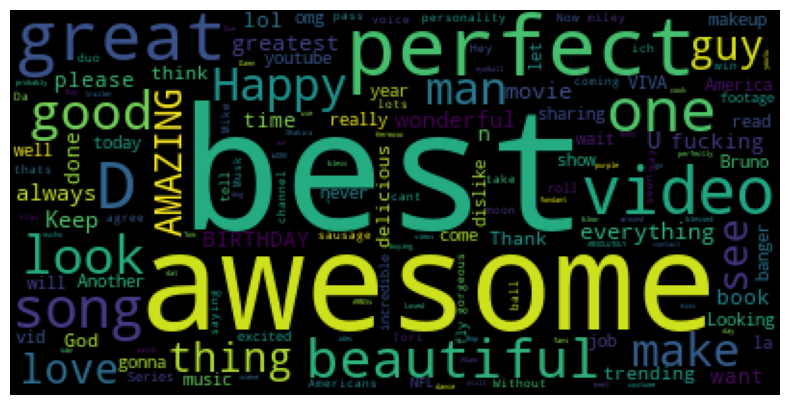

In [42]:
wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_comments2)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

#### Conclusion :  Users are emphasizing more on best, awesome, perfect,beautiful etc..

## 3..Perform Emoji's Analysis


In [43]:
comments.head(14)

video_id                                       comment_text likes  \
367112  ml8Dj5OSR-M  the most northernmost town is actually Alert,C...     0   
272518  kFx0h3YDXz0                                CANADA TORONTO!!!!!     1   
157835  yIq-N7m0upU                                                Wow     0   
399699  2UMfEfUR7wM  Not a bad tune, but holy cow that many placeme...     0   
131024  sD6RIeNP41I  You guys dont seem to understand the game. You...     0   
45800   _HTXMhKWqnA                             IS IT WATER RESISTANT?     0   
398148  Ilekd7_Kodw  I was on the ship when this happened.... I did...     0   
641699  WHvT-oGf6ik        Where’s the album already?? This is dope ❤️     0   
47293   cMKX2tE5Luk  What is the song used in the second half of th...     0   
261049  8WyDjXSLg88            1:01-1:25 what's the name of that song?     0   
319840  Ap5hoCTkTUM        Wowow sooo funny luv u anwar😘😘😘😘😘😂😂😂😂😂😂😂😂😂😂     0   
508469  nrzbCPOcIJk         Where did you get your jumpsuit? I love!!!     0   
457027  SqUXhozARl4  that's a hades tomb.  occultists take kidnappe...     1   
487535  a5F05Qpi6lM                      From fake news to fake views.     0   

       replies  polarity  subjectivity  
367112       2  0.250000      0.300000  
272518       0  0.000000      0.000000  
157835       0  0.100000      1.000000  
399699       0  0.304167      0.458333  
131024       0  0.073333      0.353333  
45800        0  0.000000      0.000000  
398148       0  0.550000      0.944444  
641699       0  0.000000      0.000000  
47293        0 -0.083333      0.083333  
261049       0  0.000000      0.000000  
319840       0  0.250000      1.000000  
508469       0  0.976562      0.600000  
457027       0  0.000000      0.000000  
487535       1 -0.500000      1.000000

In [44]:
### lets extract emoji from below comment
comment='trending 😉'

In [45]:
comment

'trending 😉'

In [46]:
[c for c in comment if c in emoji.distinct_emoji_list(comment)]

['😉']

In [47]:
#searching for all the emojis in comments

In [48]:
emoji_list=[]
for comment in comments['comment_text']:
    for char in comment:
        if char in emoji.distinct_emoji_list(comment):
            emoji_list.append(char)

In [49]:
len(emoji_list)

3564

In [50]:
emoji_list[:10]

['😘', '😘', '😘', '😘', '😘', '😂', '😂', '😂', '😂', '😂']

#### Now we have to compute frequencies of each & every emojis..

In [51]:
Counter(emoji_list).most_common(10)

[('😂', 507),
 ('😍', 340),
 ('❤', 273),
 ('🔥', 153),
 ('😭', 113),
 ('💖', 113),
 ('💕', 96),
 ('💓', 80),
 ('😁', 69),
 ('💗', 58)]

In [52]:
#most common emoji
Counter(emoji_list).most_common(10)[0][0]

'😂'

In [53]:
#occurances of most  common emoji
Counter(emoji_list).most_common(10)[0][1]

507

In [54]:
emojis=[Counter(emoji_list).most_common(10)[i][0] for i in range(10)]

In [55]:
emojis

['😂', '😍', '❤', '🔥', '😭', '💖', '💕', '💓', '😁', '💗']

In [56]:
freqs=[Counter(emoji_list).most_common(10)[i][1] for i in range(10)]
freqs

[507, 340, 273, 153, 113, 113, 96, 80, 69, 58]

In [57]:
import plotly.graph_objs as go

In [58]:
from plotly.offline import iplot

In [59]:
trace=go.Bar(x=emojis,y=freqs)

In [60]:
iplot([trace])

### Alternate method to create an emoji,frequency dictionary from scratch

In [61]:
def CountFrequency(my_list):
 
    # Creating an empty dictionary
    freq = {}
    for item in my_list:
        if item in freq:
            freq[item] += 1
        else:
            freq[item] = 1
    return freq

In [62]:
emoji_dict = CountFrequency(emoji_list)
emoji_dict

{'😘': 46,
 '😂': 507,
 '😭': 113,
 '😻': 12,
 '🎵': 6,
 '😳': 5,
 '🙈': 5,
 '✨': 6,
 '😖': 3,
 '😆': 17,
 '🤗': 6,
 '❤': 273,
 '🤙': 2,
 '💩': 4,
 '😵': 4,
 '🎈': 9,
 '😍': 340,
 '🔥': 153,
 '😀': 35,
 '💓': 80,
 '💀': 29,
 '😁': 69,
 '🤓': 8,
 '👍': 46,
 '😮': 6,
 '🙊': 2,
 '🙉': 1,
 '😝': 8,
 '🌟': 5,
 '😎': 15,
 '💛': 37,
 '♥': 42,
 '🎍': 1,
 '🎃': 33,
 '😄': 15,
 '🐶': 7,
 '🎉': 11,
 '🙃': 6,
 '😢': 29,
 '💖': 113,
 '🐛': 1,
 '👌': 34,
 '😙': 22,
 '😉': 13,
 '🗑': 1,
 '😔': 7,
 '🖤': 29,
 '💜': 44,
 '😊': 47,
 '👇': 4,
 '🙄': 7,
 '😑': 13,
 '😬': 5,
 '😫': 19,
 '👎': 5,
 '🤢': 5,
 '🎩': 1,
 '🤠': 1,
 '💥': 5,
 '💙': 50,
 '🤔': 20,
 '☺': 2,
 '😅': 23,
 '🙌': 14,
 '🤣': 18,
 '🙏': 8,
 '💕': 96,
 '💗': 58,
 '💯': 13,
 '👏': 52,
 '™': 1,
 '👅': 4,
 '😚': 12,
 '😋': 3,
 '😏': 9,
 '😩': 13,
 '💦': 2,
 '👑': 14,
 '🎊': 3,
 '😱': 31,
 '☢': 1,
 '🚫': 2,
 '😤': 1,
 '🍑': 2,
 '😡': 10,
 '👀': 7,
 '🌹': 3,
 '☝': 1,
 '🤘': 3,
 '🌩': 1,
 '🐑': 42,
 '😒': 10,
 '🙋': 5,
 '🌈': 5,
 '😶': 4,
 '💋': 28,
 '☄': 1,
 '😇': 4,
 '🌌': 6,
 '😞': 7,
 '💚': 37,
 '💪': 6,
 '🔫': 1,
 '💞': 49,
 '❣': 8,
 

In [63]:
sorted_dict = sorted(emoji_dict.items(), key=lambda x:x[1],reverse=True)
sorted_dict

[('😂', 507),
 ('😍', 340),
 ('❤', 273),
 ('🔥', 153),
 ('😭', 113),
 ('💖', 113),
 ('💕', 96),
 ('💓', 80),
 ('😁', 69),
 ('💗', 58),
 ('👏', 52),
 ('💙', 50),
 ('💞', 49),
 ('😊', 47),
 ('😘', 46),
 ('👍', 46),
 ('💜', 44),
 ('♥', 42),
 ('🐑', 42),
 ('💛', 37),
 ('💚', 37),
 ('😀', 35),
 ('👌', 34),
 ('🎃', 33),
 ('💟', 32),
 ('😱', 31),
 ('💀', 29),
 ('😢', 29),
 ('🖤', 29),
 ('💋', 28),
 ('🍜', 24),
 ('😅', 23),
 ('💔', 23),
 ('😙', 22),
 ('🤔', 20),
 ('😫', 19),
 ('🤣', 18),
 ('😆', 17),
 ('💝', 17),
 ('💘', 16),
 ('😎', 15),
 ('😄', 15),
 ('✊', 15),
 ('🙌', 14),
 ('👑', 14),
 ('😉', 13),
 ('😑', 13),
 ('💯', 13),
 ('😩', 13),
 ('😻', 12),
 ('😚', 12),
 ('💸', 12),
 ('😗', 12),
 ('🎉', 11),
 ('💰', 11),
 ('🍊', 11),
 ('😡', 10),
 ('😒', 10),
 ('💎', 10),
 ('🎈', 9),
 ('😏', 9),
 ('😃', 9),
 ('😕', 9),
 ('🤓', 8),
 ('😝', 8),
 ('🙏', 8),
 ('❣', 8),
 ('😜', 8),
 ('⭐', 8),
 ('🐶', 7),
 ('😔', 7),
 ('🙄', 7),
 ('👀', 7),
 ('😞', 7),
 ('😐', 7),
 ('🤞', 7),
 ('🎵', 6),
 ('✨', 6),
 ('🤗', 6),
 ('😮', 6),
 ('🙃', 6),
 ('🌌', 6),
 ('💪', 6),
 ('🎶', 6),
 ('🎤', 6),


## 4..Collect Entire data of Youtube !


In [64]:
import os

In [65]:
path=r'C:\Users\suraj.lahase\Desktop\personal_projects\Text_data_analysis\data\additional_data'
files=os.listdir(path)

In [66]:
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [67]:
files_csv=[files[i] for i in range(0,len(files),2)]

In [68]:
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [69]:
# To find the country of the data from filename
files_csv[0].split('.')[0][0:2]

'CA'

In [70]:
full_df=pd.DataFrame()

for file in files_csv:
    current_df=pd.read_csv(path+'/'+file,encoding='iso-8859-1',)
    
    current_df['country']=file.split('.')[0][0:2]
    full_df=pd.concat([full_df,current_df])
    

In [71]:
full_df.head()

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description country  
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA  
1  STill got a lot of packages. Probably will las...      CA  
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...      CA  
3  I know it's been a while since we did this sho...      CA  
4  ð§: https://ad.gt/yt-perfect\nð°: https://...      CA

In [72]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375942 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                375942 non-null  object
 1   trending_date           375942 non-null  object
 2   title                   375942 non-null  object
 3   channel_title           375942 non-null  object
 4   category_id             375942 non-null  int64 
 5   publish_time            375942 non-null  object
 6   tags                    375942 non-null  object
 7   views                   375942 non-null  int64 
 8   likes                   375942 non-null  int64 
 9   dislikes                375942 non-null  int64 
 10  comment_count           375942 non-null  int64 
 11  thumbnail_link          375942 non-null  object
 12  comments_disabled       375942 non-null  bool  
 13  ratings_disabled        375942 non-null  bool  
 14  video_error_or_removed  375942 non-nu

## 5.. Which Category has the maximum likes ?

In [73]:
full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [74]:
cat=pd.read_csv(r'data\category_file.txt',sep=':')
cat
         

Category_id      Category_name
1            \t\tFilm & Animation
2            \t\tAutos & Vehicles
10                      \t\tMusic
15             \t\tPets & Animals
17                     \t\tSports
18               \t\tShort Movies
19            \t\tTravel & Events
20                     \t\tGaming
21              \t\tVideoblogging
22             \t\tPeople & Blogs
23                     \t\tComedy
24              \t\tEntertainment
25            \t\tNews & Politics
26              \t\tHowto & Style
27                  \t\tEducation
28       \t\tScience & Technology
29      \t\tNonprofits & Activism
30                     \t\tMovies
31            \t\tAnime/Animation
32           \t\tAction/Adventure
33                   \t\tClassics
34                     \t\tComedy
35                \t\tDocumentary
36                      \t\tDrama
37                     \t\tFamily
38                    \t\tForeign
39                     \t\tHorror
40             \t\tSci-Fi/Fantasy
41                   \t\tThriller
42                     \t\tShorts
43                      \t\tShows
44       \t\tTrailers

In [75]:
cat.reset_index(inplace=True)

In [76]:
cat.columns=['category_id','Category_name']

In [77]:
cat.set_index('category_id',inplace=True)

In [78]:
cat


Category_name
category_id                            
1                  \t\tFilm & Animation
2                  \t\tAutos & Vehicles
10                            \t\tMusic
15                   \t\tPets & Animals
17                           \t\tSports
18                     \t\tShort Movies
19                  \t\tTravel & Events
20                           \t\tGaming
21                    \t\tVideoblogging
22                   \t\tPeople & Blogs
23                           \t\tComedy
24                    \t\tEntertainment
25                  \t\tNews & Politics
26                    \t\tHowto & Style
27                        \t\tEducation
28             \t\tScience & Technology
29            \t\tNonprofits & Activism
30                           \t\tMovies
31                  \t\tAnime/Animation
32                 \t\tAction/Adventure
33                         \t\tClassics
34                           \t\tComedy
35                      \t\tDocumentary
36                            \t\tDrama
37                           \t\tFamily
38                          \t\tForeign
39                           \t\tHorror
40                   \t\tSci-Fi/Fantasy
41                         \t\tThriller
42                           \t\tShorts
43                            \t\tShows
44             \t\tTrailers

In [79]:
cat["Category_name"] = [i.replace("\t","") for i in cat["Category_name"] ]

In [80]:
cat

Category_name
category_id                        
1                  Film & Animation
2                  Autos & Vehicles
10                            Music
15                   Pets & Animals
17                           Sports
18                     Short Movies
19                  Travel & Events
20                           Gaming
21                    Videoblogging
22                   People & Blogs
23                           Comedy
24                    Entertainment
25                  News & Politics
26                    Howto & Style
27                        Education
28             Science & Technology
29            Nonprofits & Activism
30                           Movies
31                  Anime/Animation
32                 Action/Adventure
33                         Classics
34                           Comedy
35                      Documentary
36                            Drama
37                           Family
38                          Foreign
39                           Horror
40                   Sci-Fi/Fantasy
41                         Thriller
42                           Shorts
43                            Shows
44             Trailers

In [81]:
dct=cat.to_dict()

In [82]:
dct['Category_name']

{1: ' Film & Animation',
 2: ' Autos & Vehicles',
 10: ' Music',
 15: ' Pets & Animals',
 17: ' Sports',
 18: ' Short Movies',
 19: ' Travel & Events',
 20: ' Gaming',
 21: ' Videoblogging',
 22: ' People & Blogs',
 23: ' Comedy',
 24: ' Entertainment',
 25: ' News & Politics',
 26: ' Howto & Style',
 27: ' Education',
 28: ' Science & Technology',
 29: ' Nonprofits & Activism',
 30: ' Movies',
 31: ' Anime/Animation',
 32: ' Action/Adventure',
 33: ' Classics',
 34: ' Comedy',
 35: ' Documentary',
 36: ' Drama',
 37: ' Family',
 38: ' Foreign',
 39: ' Horror',
 40: ' Sci-Fi/Fantasy',
 41: ' Thriller',
 42: ' Shorts',
 43: ' Shows',
 44: ' Trailers            '}

In [83]:
full_df['category_name']=full_df['category_id'].map(dct['Category_name'])

In [84]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'category_name'],
      dtype='object')

In [85]:
full_df.head()

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description country   category_name  
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA           Music  
1  STill got a lot of packages. Probably will las...      CA          Comedy  
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...      CA          Comedy  
3  I know it's been a while since we did this sho...      CA   Entertainment  
4  ð§: https://ad.gt/yt-perfect\nð°: https://...      CA           Music

In [86]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375942 entries, 0 to 40948
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                375942 non-null  object
 1   trending_date           375942 non-null  object
 2   title                   375942 non-null  object
 3   channel_title           375942 non-null  object
 4   category_id             375942 non-null  int64 
 5   publish_time            375942 non-null  object
 6   tags                    375942 non-null  object
 7   views                   375942 non-null  int64 
 8   likes                   375942 non-null  int64 
 9   dislikes                375942 non-null  int64 
 10  comment_count           375942 non-null  int64 
 11  thumbnail_link          375942 non-null  object
 12  comments_disabled       375942 non-null  bool  
 13  ratings_disabled        375942 non-null  bool  
 14  video_error_or_removed  375942 non-nu

In [87]:
full_df.isna().sum()

video_id                      0
trending_date                 0
title                         0
channel_title                 0
category_id                   0
publish_time                  0
tags                          0
views                         0
likes                         0
dislikes                      0
comment_count                 0
thumbnail_link                0
comments_disabled             0
ratings_disabled              0
video_error_or_removed        0
description               19478
country                       0
category_name                 0
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

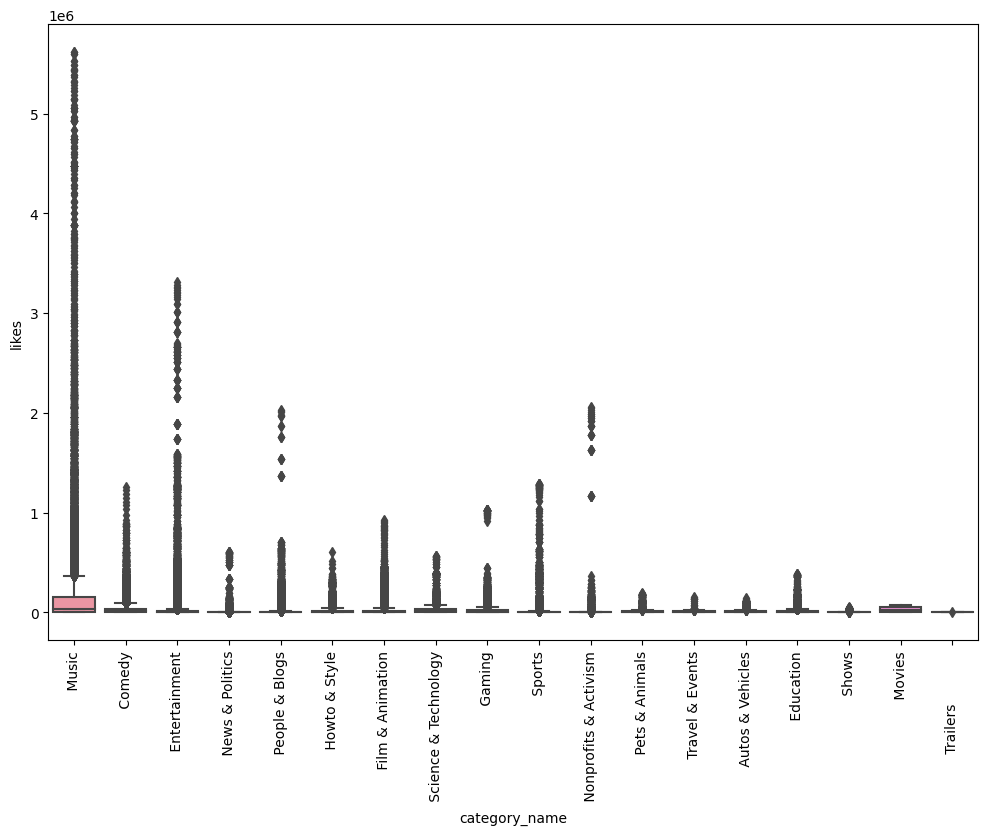

In [88]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name',y='likes',data=full_df)
plt.xticks(rotation='vertical')

#### How to extract category from json file ( US_category_id.json)

In [89]:
import json
with open(r"data\additional_data\US_category_id.json") as f:
    categories = json.load(f)

In [90]:
categories


{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

In [91]:
### lets access 'items' key from dictionary..  bcz for each dict , ["snippet"]["title"] gives 'title_name'

In [92]:
categories['items']

[{'kind': 'youtube#videoCategory',
  'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
  'id': '1',
  'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
   'title': 'Film & Animation',
   'assignable': True}},
 {'kind': 'youtube#videoCategory',
  'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
  'id': '2',
  'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
   'title': 'Autos & Vehicles',
   'assignable': True}},
 {'kind': 'youtube#videoCategory',
  'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
  'id': '10',
  'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
   'title': 'Music',
   'assignable': True}},
 {'kind': 'youtube#videoCategory',
  'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"',
  'id': '15',
  'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
   'title': 'Pets & Animals',
   'assignable': True}},
 {'kind': 'youtube#videoCategory',
  'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHe

In [93]:
#### now lets create one more dictionary & store data(category_id : category_name) in the form of key:value pairs..

In [94]:
cat_dict = {}
for cat in categories['items']:
    ## cat[key]=value
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
    

In [95]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [96]:
full_df['category_name']=full_df['category_id'].map(dct['Category_name'])
full_df['category_name']

0                    Music
1                   Comedy
2                   Comedy
3            Entertainment
4                    Music
               ...        
40944       Pets & Animals
40945       People & Blogs
40946        Entertainment
40947     Film & Animation
40948               Gaming
Name: category_name, Length: 375942, dtype: object

## 6.. Find out whether audience is engaged or not

In [97]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'category_name'],
      dtype='object')

In [98]:
full_df['like_rate']=(full_df['likes']/full_df['views'])*100
full_df['dislike_rate']=(full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate']=(full_df['comment_count']/full_df['views'])*100

In [99]:
full_df.head()

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  ...                                  thumbnail_link  \
0     43420  ...  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688  ...  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339  ...  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989  ...  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082  ...  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

  comments_disabled  ratings_disabled  video_error_or_removed  \
0             False             False                   False   
1             False             False                   False   
2             False             False                   False   
3             False             False                   False   
4             False             False                   False   

                                         description country   category_name  \
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA           Music   
1  STill got a lot of packages. Probably will las...      CA          Comedy   
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...      CA          Comedy   
3  I know it's been a while since we did this sho...      CA   Entertainment   
4  ð§: https://ad.gt/yt-perfect\nð°: https://...      CA           Music   

   like_rate  dislike_rate  comment_count_rate  
0   4.589104      0.253051            0.733639  
1  12.594873      0.166363            1.284185  
2   4.575843      0.167292            0.256342  
3   6.309630      0.094903            0.835851  
4   4.874563      0.062887            0.253752  

[5 rows x 21 columns]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

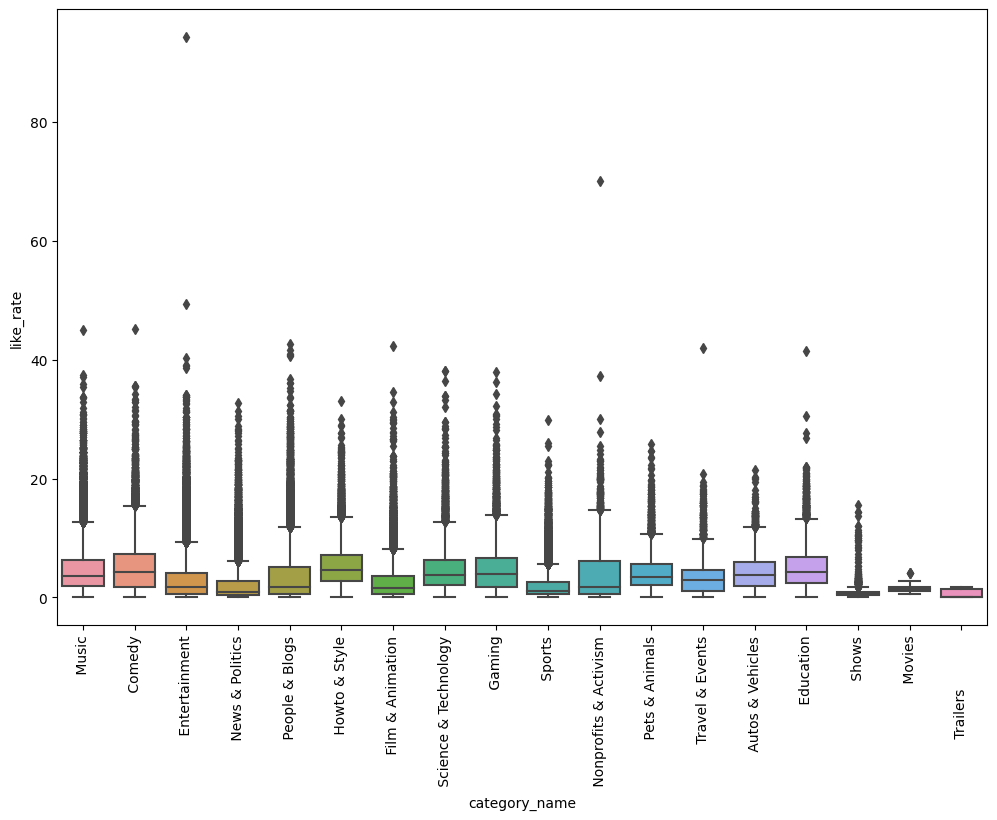

In [100]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name',y='like_rate',data=full_df)
plt.xticks(rotation='vertical')

### analysing relationship between views & likes

<Axes: xlabel='views', ylabel='likes'>

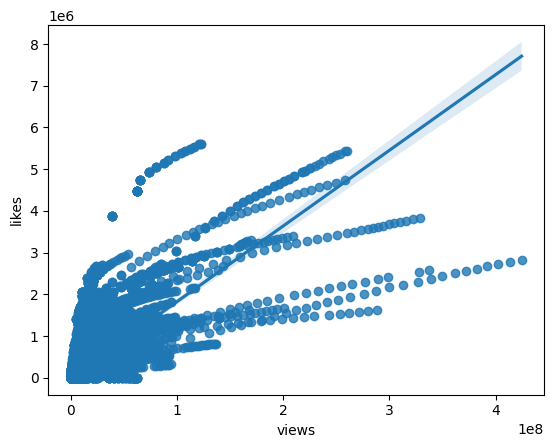

In [101]:
sns.regplot(data=full_df,x='views',y='likes')

### finding co-relation values between ['views', 'likes', 'dislikes']

<Axes: >

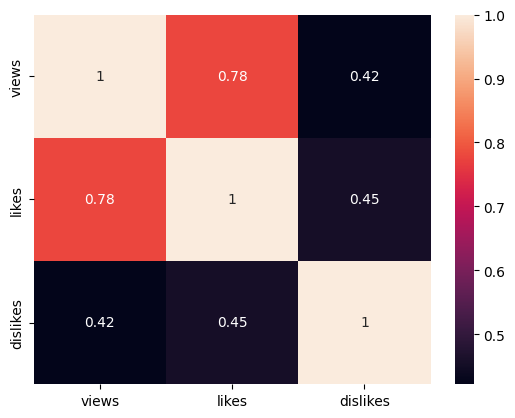

In [102]:
sns.heatmap(full_df[['views', 'likes', 'dislikes']].corr(),annot=True)

In [103]:
full_df.head()

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  ...                                  thumbnail_link  \
0     43420  ...  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688  ...  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339  ...  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989  ...  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082  ...  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

  comments_disabled  ratings_disabled  video_error_or_removed  \
0             False             False                   False   
1             False             False                   False   
2             False             False                   False   
3             False             False                   False   
4             False             False                   False   

                                         description country   category_name  \
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA           Music   
1  STill got a lot of packages. Probably will las...      CA          Comedy   
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...      CA          Comedy   
3  I know it's been a while since we did this sho...      CA   Entertainment   
4  ð§: https://ad.gt/yt-perfect\nð°: https://...      CA           Music   

   like_rate  dislike_rate  comment_count_rate  
0   4.589104      0.253051            0.733639  
1  12.594873      0.166363            1.284185  
2   4.575843      0.167292            0.256342  
3   6.309630      0.094903            0.835851  
4   4.874563      0.062887            0.253752  

[5 rows x 21 columns]

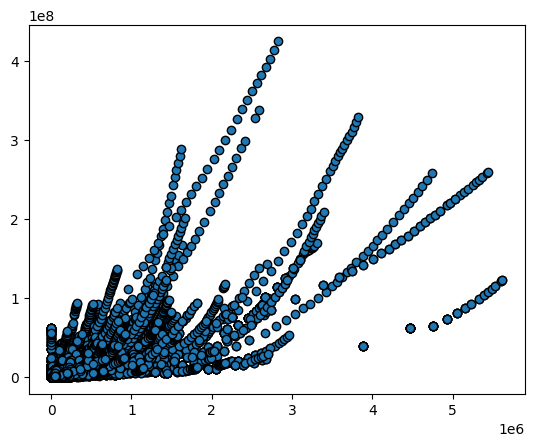

In [104]:
#### Create scatterplot between 'views' & 'likes'
plt.scatter(full_df['likes'],full_df['views'],edgecolors="#000000")

In [105]:
full_df["country"]

0        CA
1        CA
2        CA
3        CA
4        CA
         ..
40944    US
40945    US
40946    US
40947    US
40948    US
Name: country, Length: 375942, dtype: object

<Axes: xlabel='views', ylabel='likes'>

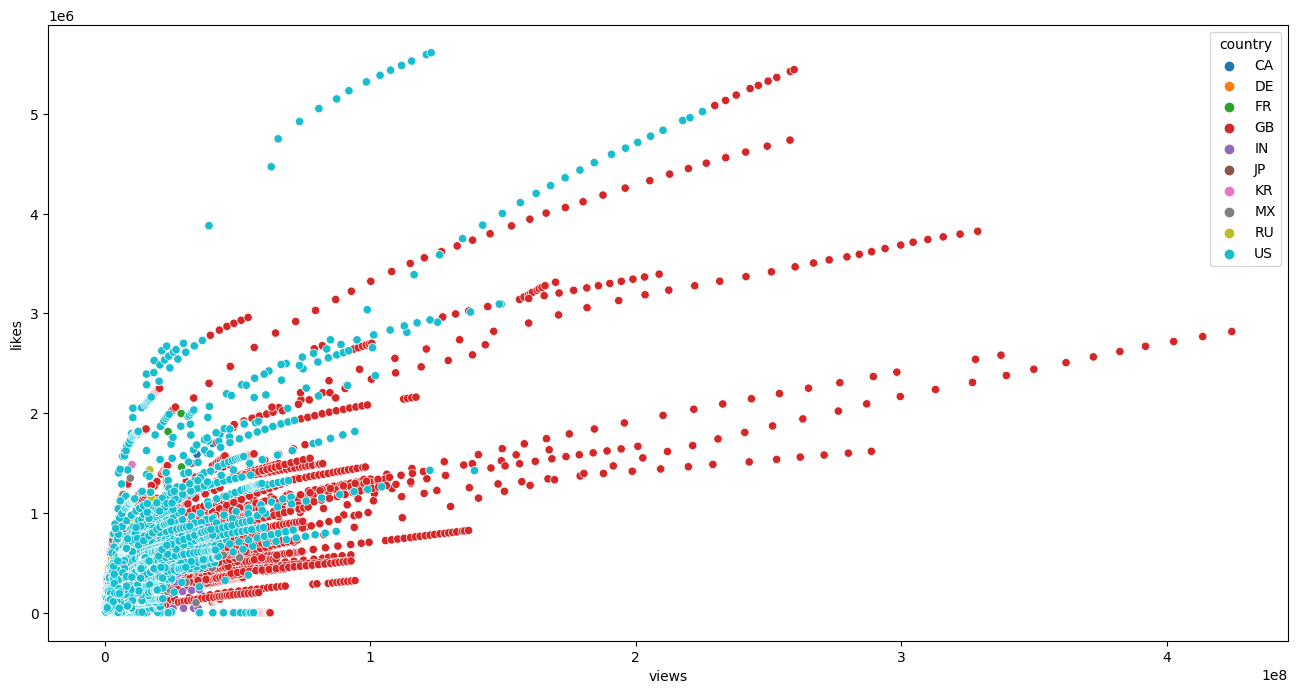

In [106]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=full_df["views"], y=full_df["likes"], hue=full_df["country"])

## 7..Which channels have the largest number of trending videos?

In [107]:
cdf=full_df.groupby('channel_title')['video_id'].count().sort_values(ascending=False).to_frame().reset_index().rename(columns={'video_id':'total_videos'})

In [108]:
cdf

channel_title  total_videos
0      The Late Show with Stephen Colbert           984
1                                     WWE           804
2             Late Night with Seth Meyers           773
3                               VikatanTV           763
4                            TheEllenShow           743
...                                   ...           ...
37819                   LIGHTS - 001 jrny             1
37820                          bangtanist             1
37821                      LIGAMX Femenil             1
37822             LIGA COLOMBIANA OFICIAL             1
37823                    Pavel Sidorik TV             1

[37824 rows x 2 columns]

In [109]:
import plotly.express as px

In [110]:
px.bar(data_frame=cdf[0:20],x='channel_title',y='total_videos')

## 8..Does Punctuations in title and tags have any relation with views, likes, dislikes comments?

In [111]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [112]:
# def punc_count(x):
    # return len([c for c in x if c in string.punctuation])


def punc_count(text):
    count = 0
    for char in text:
        if char in string.punctuation:
            count += 1
    return count

In [113]:
full_df['title'][0]

0          Eminem - Walk On Water (Audio) ft. BeyoncÃ©
0    Sing zu Ende! | Gesangseinlagen vom Feinsten |...
0             Malika LePen : Femme de Gauche - Trailer
0        John Lewis Christmas Ad 2017 - #MozTheMonster
0    Sharry Mann: Cute Munda ( Song Teaser) | Parmi...
0    é¸èªããªãåç´ã«è½ä¸ï¼è·¯ä¸ã®è»ã...
0             ì¢ì by ë¯¼ì_ì¤ì¢
ì _ì¢ë ëµê°
0                       CapÃ­tulo 12 | MasterChef 2017
0    ÐÐ°Ñ
Ð°Ñ Ð¸ ÐÐ¾Ð»Ð¸Ð½Ð° ÑÑÐ°ÑÑÑ ÑÐºÐ¾...
0                   WE WANT TO TALK ABOUT OUR MARRIAGE
Name: title, dtype: object

In [139]:
text='Eminem - Walk On Water (Audio) ft. BeyoncÃ©'

In [140]:
punc_count(text)


4

In [116]:
sample=full_df[0:10000]

In [117]:
#sample['count_punc']=[punc_count(i) for i in sample['title']]
sample.loc[:,'count_punc'] = sample['title'].apply(punc_count)

C:\Users\suraj.lahase\AppData\Local\Temp\ipykernel_5468\3647385271.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [118]:
sample['count_punc']

0       4
1       1
2       3
3       3
4       3
       ..
9995    6
9996    0
9997    1
9998    0
9999    6
Name: count_punc, Length: 10000, dtype: int64

In [119]:
sample.head()

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  ...  comments_disabled ratings_disabled  video_error_or_removed  \
0     43420  ...              False            False                   False   
1      1688  ...              False            False                   False   
2      5339  ...              False            False                   False   
3      1989  ...              False            False                   False   
4     21082  ...              False            False                   False   

                                         description  country   category_name  \
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...       CA           Music   
1  STill got a lot of packages. Probably will las...       CA          Comedy   
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...       CA          Comedy   
3  I know it's been a while since we did this sho...       CA   Entertainment   
4  ð§: https://ad.gt/yt-perfect\nð°: https://...       CA           Music   

   like_rate dislike_rate  comment_count_rate  count_punc  
0   4.589104     0.253051            0.733639           4  
1  12.594873     0.166363            1.284185           1  
2   4.575843     0.167292            0.256342           3  
3   6.309630     0.094903            0.835851           3  
4   4.874563     0.062887            0.253752           3  

[5 rows x 22 columns]

<Axes: xlabel='count_punc', ylabel='views'>

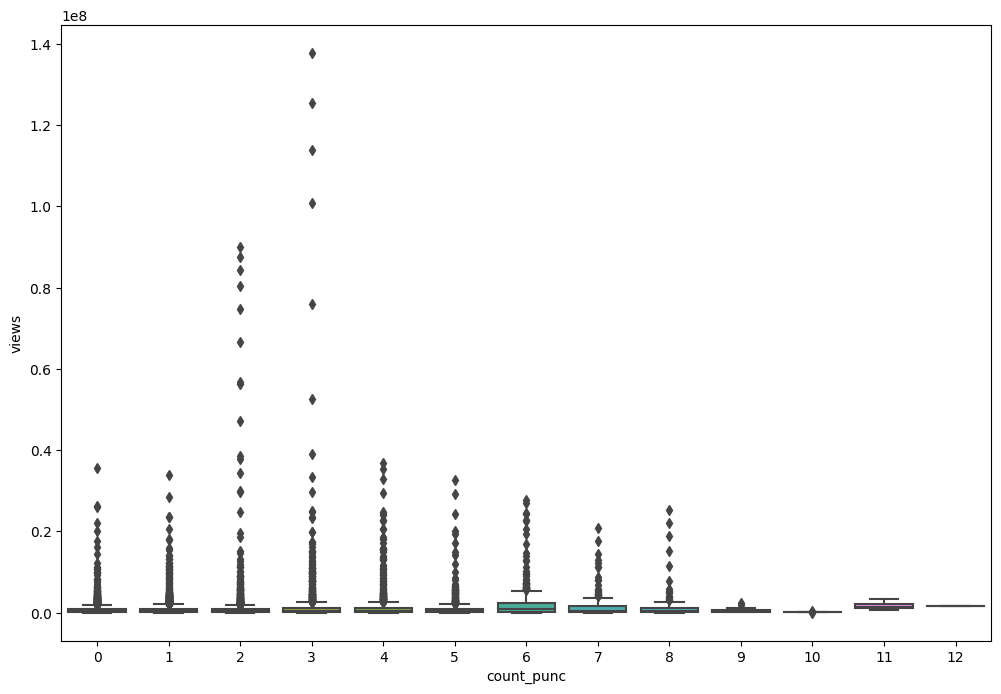

In [120]:
plt.figure(figsize=(12,8))
sns.boxplot(x='count_punc',y='views',data=sample)

In [121]:
sample['count_punc'].corr(sample['views'])

0.06510009783044846

### How to remove punctuation from data using regular expression

In [144]:
import re

text = "Eminem - Walk On Water (Audio) ft. BeyoncÃ©"

# define the pattern to match punctuation
punctuation_pattern = r'[^\w\s]'

# count the number of changes made
count = len(re.findall(punctuation_pattern, text))

# remove all punctuation from the text
text = re.sub(punctuation_pattern, '', text)

print(text)  # output: "Eminem  Walk On Water Audio ft Beyoncé"
print(count)  # output: 5


Eminem  Walk On Water Audio ft BeyoncÃ
5


In [146]:
# define the regular expression pattern for punctuation
punctuation_pattern = r'[^\w\s]'
output_string = []
punc_count = []

for i in range(len(sample["title"])):
    # remove punctuation using the sub() function of the re module
    output_string.append(re.sub(punctuation_pattern, '', str(sample["title"][i])))
    punc_count.append(len(re.findall(punctuation_pattern,str(sample["title"][i]))))


In [147]:
sample['modified_title'] = output_string
sample['punc_count'] = punc_count
sample.head()

C:\Users\suraj.lahase\AppData\Local\Temp\ipykernel_5468\3940339606.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\suraj.lahase\AppData\Local\Temp\ipykernel_5468\3940339606.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  ...  video_error_or_removed  \
0     43420  ...                   False   
1      1688  ...                   False   
2      5339  ...                   False   
3      1989  ...                   False   
4     21082  ...                   False   

                                         description  country   category_name  \
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...       CA           Music   
1  STill got a lot of packages. Probably will las...       CA          Comedy   
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...       CA          Comedy   
3  I know it's been a while since we did this sho...       CA   Entertainment   
4  ð§: https://ad.gt/yt-perfect\nð°: https://...       CA           Music   

   like_rate dislike_rate comment_count_rate count_punc  \
0   4.589104     0.253051           0.733639          4   
1  12.594873     0.166363           1.284185          1   
2   4.575843     0.167292           0.256342          3   
3   6.309630     0.094903           0.835851          3   
4   4.874563     0.062887           0.253752          3   

                                      modified_title  punc_count  
0             Eminem  Walk On Water Audio ft BeyoncÃ           5  
1                       PLUSH  Bad Unboxing Fan Mail           1  
2  Racist Superman  Rudy Mancuso King Bach  Lele ...           3  
3                              I Dare You GOING BALD           3  
4           Ed Sheeran  Perfect Official Music Video           3  

[5 rows x 24 columns]

In [148]:
sample['punc_count'].corr(sample['views'])

-0.04581619883761787

#### Note - The results are different here than the previous one because some characters were not included in preveious section whereas the regex is considering punctuation as every other character except space and alphabet